In [8]:
import pandas as pd

df = pd.read_csv('asthma.csv')
df.head()

,Patient_ID,Age,Gender,BMI,Smoking_Status,Family_History,Allergies,Air_Pollution_Level,Physical_Activity_Level,Occupation_Type,Comorbidities,Medication_Adherence,Number_of_ER_Visits,Peak_Expiratory_Flow,FeNO_Level,Has_Asthma,Asthma_Control_Level
0,ASTH100000,52,Female,27.6,Former,1,NaN,Moderate,Sedentary,Outdoor,Diabetes,0.38,0,421.0,46.0,0,NaN
1,ASTH100001,15,Male,24.6,Former,0,Dust,Low,Moderate,Indoor,Both,0.60,2,297.6,22.9,0,NaN
2,ASTH100002,72,Female,17.6,Never,0,NaN,Moderate,Moderate,Indoor,NaN,0.38,0,303.3,15.3,0,NaN
3,ASTH100003,61,Male,16.8,Never,0,Multiple,High,Sedentary,Outdoor,Both,0.60,1,438.0,40.1,1,Poorly Controlled
4,ASTH100004,21,Male,30.2,Never,0,NaN,Moderate,Active,Indoor,NaN,0.82,3,535.0,27.7,0,NaN


In [9]:


df = df.drop(columns = ['Patient_ID', 'Asthma_Control_Level'])


In [10]:
df.dropna()
df['Occupation_Type'] = df['Occupation_Type'].map({'Outdoor' : 1, 'Indoor' : 0})
label_enc = ['Gender', 'Smoking_Status', 'Allergies', 'Comorbidities']
ord_enc = ['Air_Pollution_Level', 'Physical_Activity_Level']

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

oec = OrdinalEncoder()
le = LabelEncoder()
for col in label_enc:
    df[col] = le.fit_transform(df[col])

df[ord_enc] = oec.fit_transform(df[ord_enc])


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
X = df.drop('Has_Asthma', axis = 1)
y = df['Has_Asthma']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,
    max_depth=10,              # Limit tree depth
    min_samples_split=5,       # Prevent overly specific splits
    min_samples_leaf=4,
    class_weight='balanced',
    random_state=42)

model.fit(X_scaled_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

y_pred_train = model.predict(X_scaled_train)
y_pred_test = model.predict(X_scaled_test)

print("Test accuracy", accuracy_score(y_test, y_pred_test))
print("Train accuracy", accuracy_score(y_train, y_pred_train))
print("Confusion matrix", confusion_matrix(y_test, y_pred_test))
print("Classification report:\n", classification_report(y_test, y_pred_test))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_scaled_test)[:, 1]))


Test accuracy 0.998
Train accuracy 1.0
Confusion matrix [[1504    0]
 [   4  492]]
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1504
           1       1.00      0.99      1.00       496

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

ROC-AUC Score: 0.9999973189773508


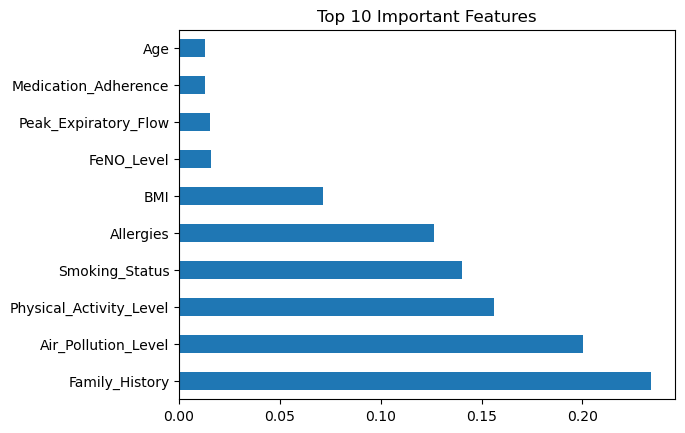

In [11]:
import matplotlib.pyplot as plt
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.show()
